<a href="https://colab.research.google.com/github/harshithamadarapu/Team16_Hinglish-Auto-suggestions/blob/main/DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

In [3]:
# Loading the dataset
df = pd.read_csv('/content/nlptrain.csv')

In [4]:
def preprocess_text(text):
    # Removing URLs starting with http or www
    text = re.sub(r'http\S+|www\S+', '', text)
    # Removing user mentions (@) and hashtags (#)
    text = re.sub(r'@\w+|#\w+', '', text)
    # Removing any numbers and non-alphabetic characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Removing any extra spaces between words
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Applying  preprocessing function
df['preprocessed_phrases'] = df['phrases'].apply(preprocess_text)
df[['phrases', 'preprocessed_phrases']].to_csv('/content/preprocessed_data.csv', index=False)

df.head()

,phrases,preprocessed_phrases
0,film ka kya naam hai,film ka kya naam hai
1,"namaste, sada hua tomatoes score mahaan hai, l...",namaste sada hua tomatoes score mahaan hai lek...
2,kya aapako lagata hai ki aapako film pasand aa...,kya aapako lagata hai ki aapako film pasand aa...
3,yah kis tarah kee philm hai,yah kis tarah kee philm hai
4,film kab banee thee?,film kab banee thee


In [5]:
def normalize_text(text):
    # Converting the text to lowercase
    return text.lower()
df['normalized_phrases'] = df['preprocessed_phrases'].apply(normalize_text)
df[['phrases', 'normalized_phrases']].to_csv('/content/normalized_data.csv', index=False)

df.head()

,phrases,preprocessed_phrases,normalized_phrases
0,film ka kya naam hai,film ka kya naam hai,film ka kya naam hai
1,"namaste, sada hua tomatoes score mahaan hai, l...",namaste sada hua tomatoes score mahaan hai lek...,namaste sada hua tomatoes score mahaan hai lek...
2,kya aapako lagata hai ki aapako film pasand aa...,kya aapako lagata hai ki aapako film pasand aa...,kya aapako lagata hai ki aapako film pasand aa...
3,yah kis tarah kee philm hai,yah kis tarah kee philm hai,yah kis tarah kee philm hai
4,film kab banee thee?,film kab banee thee,film kab banee thee


In [7]:
def tokenize_text(text):
    # Spliting the text into words by spaces
    return text.split()

# Applying the tokenization function
df['tokenized_phrases'] = df['normalized_phrases'].apply(tokenize_text)
df[['phrases', 'tokenized_phrases']].to_csv('/content/tokenized_data.csv', index=False)

df.head()

,phrases,preprocessed_phrases,normalized_phrases,tokenized_phrases
0,film ka kya naam hai,film ka kya naam hai,film ka kya naam hai,"[film, ka, kya, naam, hai]"
1,"namaste, sada hua tomatoes score mahaan hai, l...",namaste sada hua tomatoes score mahaan hai lek...,namaste sada hua tomatoes score mahaan hai lek...,"[namaste, sada, hua, tomatoes, score, mahaan, ..."
2,kya aapako lagata hai ki aapako film pasand aa...,kya aapako lagata hai ki aapako film pasand aa...,kya aapako lagata hai ki aapako film pasand aa...,"[kya, aapako, lagata, hai, ki, aapako, film, p..."
3,yah kis tarah kee philm hai,yah kis tarah kee philm hai,yah kis tarah kee philm hai,"[yah, kis, tarah, kee, philm, hai]"
4,film kab banee thee?,film kab banee thee,film kab banee thee,"[film, kab, banee, thee]"


In [9]:
from collections import Counter

all_tokens = [token for tokens in df['tokenized_phrases'] for token in tokens]

# Counting the frequency of each word
word_freq = Counter(all_tokens)

#top 10 most common words
most_common_words = word_freq.most_common(10)

#most common words and their frequencies
print("Most Common Words:")
for word, freq in most_common_words:
    print(f"{word}: {freq}")

Most Common Words:
ke: 81318
liye: 55985
hai: 55914
ko: 55262
kya: 38535
me: 32990
kare: 28297
mujhe: 23965
alarm: 23196
mere: 20463


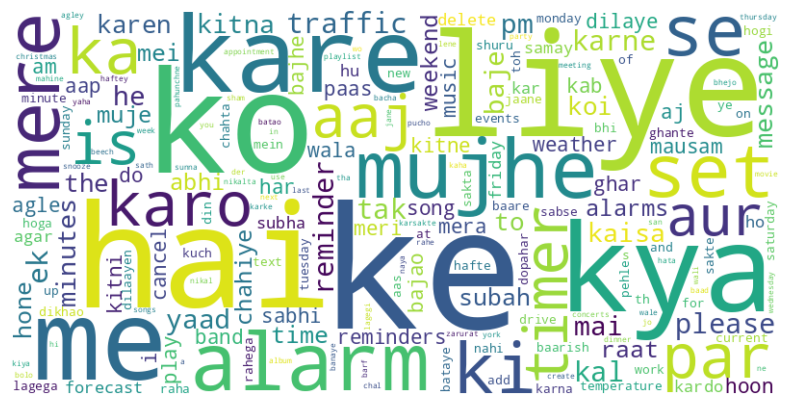

In [11]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Generating a word cloud based on word frequency
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Plotting
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

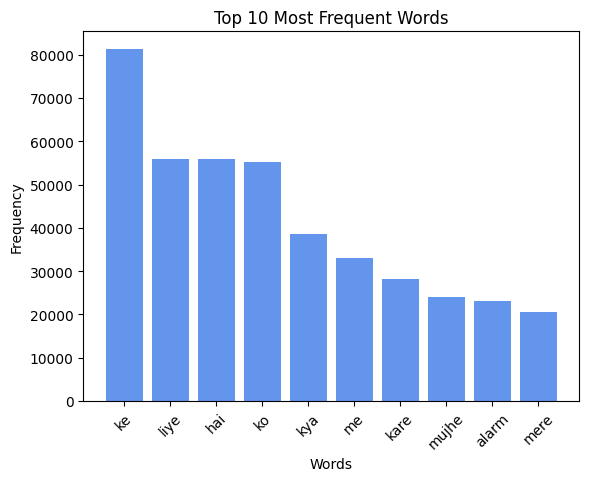

In [12]:
# top 10 most frequent words
words, counts = zip(*most_common_words)
plt.bar(words, counts, color='cornflowerblue')
plt.title('Top 10 Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()